In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
v1 = np.array([0.1920, 0.2750, 0.3040, 0.3220, 0.3360, 0.3470, 0.3570, 0.3660, 0.3750, 0.3830, 0.3910, 0.3980, 0.4050, 0.4120, 0.418])
i1 = np.array([0.0007670, 0.1250, 0.2960, 0.4780, 0.6640, 0.8531, 1.0431, 1.2341, 1.4251, 1.6171, 1.8092, 2.0022, 2.1952, 2.3882, 2.582])

v2 = np.array([0.2, 0.40, 0.5910, 0.7270, 0.7960, 0.8390, 0.870, 0.8950, 0.9170, 0.9293, 0.9360, 0.9540, 0.970, 0.98511, 1, 1.014])
i2 = np.array([0.0000160, 0.0004050, 0.0087040, 0.0730, 0.2040, 0.3610, 0.530, 0.7050, 0.8831, 1, 1.0641, 1.2461, 1.431, 1.6151, 1.81, 1.986])

In [ ]:
print(v2[:-6].size)
print(v2[-6:].size)

10
6


Text(0.5, 0, 'V_d, V')

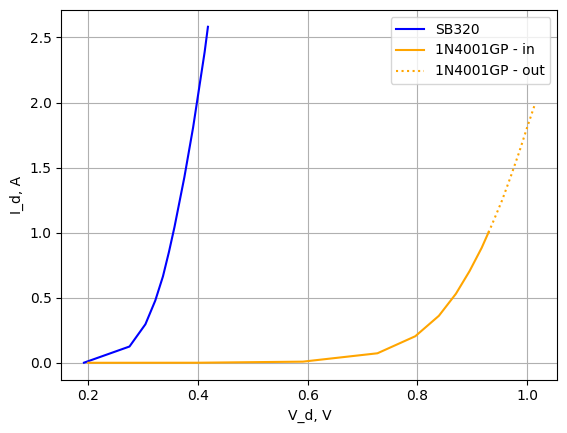

In [ ]:
plt.plot(v1, i1, label="SB320", color='blue')
plt.plot(v2[:-6], i2[:-6], label="1N4001GP - in", color='orange')
plt.plot(v2[-7:], i2[-7:], label="1N4001GP - out", color='orange', linestyle='dotted')

plt.grid()
plt.legend()
plt.ylabel('I_d, A')
plt.xlabel('V_d, V')

In [ ]:
m = 10**(-3)
mu = 10**(-6)

In [ ]:
v3 = np.array([0.4, 0.8, 1.2, 1.582, 1.723, 1.766, 1.79, 1.807, 1.82, 1.83, 1.839, 1.846, 1.853, 1.858, 1.864])
i3 = np.array([0, 0.111*mu, 0.222*mu, 0.181*m, 2.767*m, 6.338*m, 0.01, 0.014, 0.018, 0.022, 0.026, 0.03, 0.033, 0.037, 0.041])

v4 = np.array([0.4, 0.8, 1.2, 1.6, 2, 2.4, 2.799, 3.154, 3.301, 3.36, 3.395, 3.419, 3.438, 3.454, 3.467])
i4 = np.array([0, 0.111*mu, 0, 0.222*mu, 0.222*mu, 0.444*mu, 5.529*mu, 0.457*m, 2.995*m, 6.404*m, 0.01, 0.014, 0.018, 0.021, 0.025])

Text(0.5, 0, 'V_d, V')

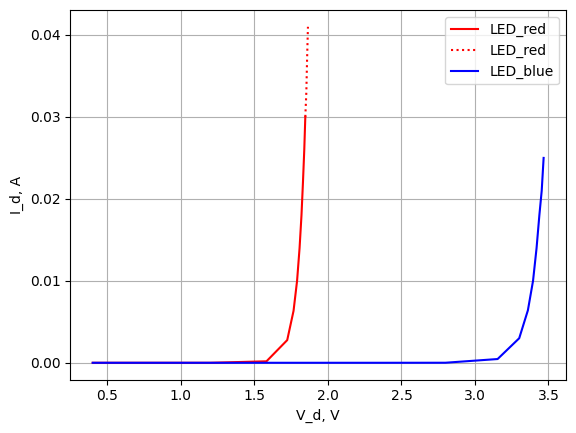

In [ ]:
plt.plot(v3[:-3], i3[:-3], label="LED_red - in", color='red')
plt.plot(v3[-4:], i3[-4:], label="LED_red - out", color='red', linestyle='dotted')
plt.plot(v4, i4, label="LED_blue", color='blue')
plt.grid()
plt.legend()
plt.ylabel('I_d, A')
plt.xlabel('V_d, V')

In [ ]:
v_all = np.linspace(-6, -0.4, 15)
i_sb = np.array([-9.825, -9.881, -9.77, -9.992, -9.992, -10, -11, -10, -10, -11, -9.77, -11, -9.77, -11, -11])
i_n = np.array([-0.666, -0.777, -0.888, -0.888, -0.888, -0.888, -0.888, -1.332, -0.888, -0.888, -0.888, -0.888, -1.776, -0.888, -0.888])
i_red = np.array([0, -0.111, -0.222, -0.222, 0, 0, -0.444, -0.444, -0.444, -1.332, -0.888, 0, 0, -0.888, -0.888])
i_blue = i_red

Text(0.5, 0, 'V_d, V')

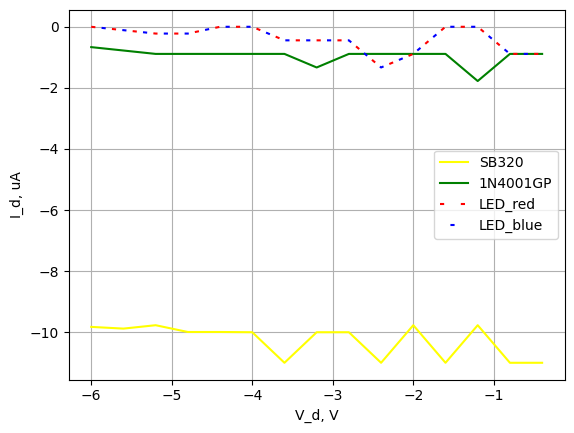

In [ ]:
plt.plot(v_all, i_sb, label="SB320", color='yellow')
plt.plot(v_all, i_n, label="1N4001GP", color='green')
plt.plot(v_all, i_red, label="LED_red", color='red', linestyle=(0, (2, 8)))
plt.plot(v_all, i_blue, label="LED_blue", color='blue', linestyle=(5, (2, 8)))

plt.grid()
plt.legend()
plt.ylabel('I_d, uA')
plt.xlabel('V_d, V')

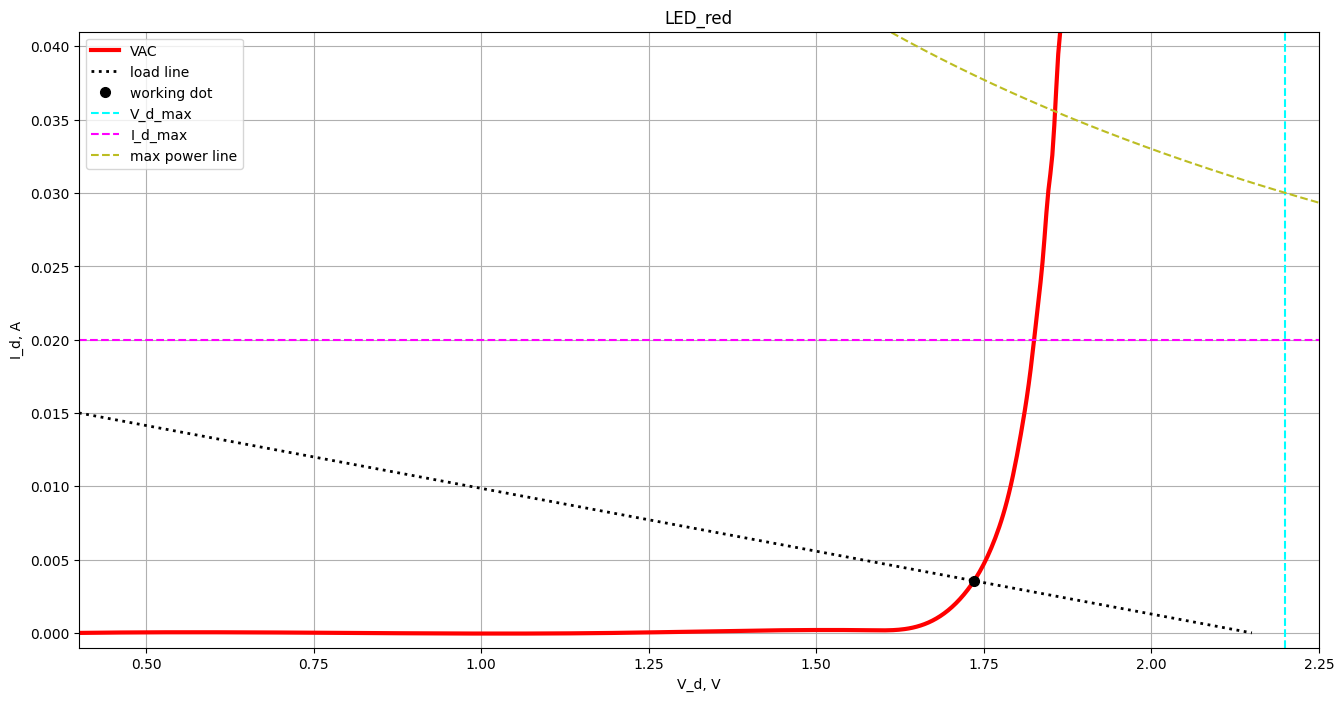

In [101]:
from scipy.interpolate import make_interp_spline, BSpline

v3 = np.array([0.4, 0.8, 1.2, 1.582, 1.723, 1.766, 1.79, 1.807, 1.82, 1.83, 1.839, 1.846, 1.853, 1.858, 1.864])
i3 = np.array([0, 0.111*mu, 0.222*mu, 0.181*m, 2.767*m, 6.338*m, 0.01, 0.014, 0.018, 0.022, 0.026, 0.03, 0.033, 0.037, 0.041])

v3_new = np.linspace(v3.min(), v3.max(), 500) 

spl = make_interp_spline(v3, i3, k=3)  # type: BSpline
i3_new = spl(v3_new)

plt.figure(figsize=((16, 8)))
plt.grid()
plt.title('LED_red')
plt.xlabel('V_d, V')
plt.ylabel('I_d, A')
plt.xlim(0.4, 2.25)
plt.ylim(-0.001, 0.041)
plt.plot(v3_new, i3_new, color='red', label='VAC', linewidth=3)

plt.plot(np.array([0.4, 2.15]), np.array([0.015, 0]), color='black', linewidth=2, linestyle='dotted', label='load line')
load_line_y = (v3_new - 2.15)/(-116.667)
idx = np.argwhere(np.diff(np.sign(i3_new - load_line_y))).flatten()
plt.plot(v3_new[idx], i3_new[idx], 'o', markersize=7, label = 'working dot',color='black')

plt.axvline(x = 2.2, color = 'cyan', linestyle='--', label = 'V_d_max')
plt.axhline(y = 0.02, color = 'magenta', linestyle='--', label= 'I_d_max')
plt.plot(np.linspace(0.4, 2.25, 500), 0.066 / np.linspace(0.4, 2.25, 500), color='tab:olive', linestyle='--', label='max power line')
plt.legend()
plt.show()

In [102]:
v3_new[idx], i3_new[idx]

(array([1.73490982]), array([0.00351158]))